# Test task for Insilico Medicine

## 1. Importing libraries and loading data

In [196]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_auc_score 
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

s = tf.InteractiveSession()

In [3]:
df = pd.read_csv('train.csv')
df.head()

,feature-0,feature-1,feature-2,feature-3,feature-4,feature-5,feature-6,feature-7,feature-8,feature-9,...,feature-1515,feature-1516,feature-1517,feature-1518,feature-1519,feature-1520,feature-1521,feature-1522,feature-1523,y
0,37.977273,6.758452,3.636364,10.792929,160.801682,151.109783,1.791689,6.818675,8.138413,8.270161,...,5.658393,4.151040,4.540632,4.953183,5.351562,5.311048,5.560922,5.643015,5.715999,0.0
1,19.408163,5.933978,2.816327,5.877551,162.949911,76.153796,1.381401,6.002651,5.080499,7.514421,...,4.830811,3.817712,4.123094,4.426343,4.823804,4.652173,4.795274,4.860781,5.001426,0.0
2,40.265306,7.425645,3.734694,13.160998,172.099640,161.790879,1.603976,7.410120,10.114794,8.805738,...,6.397659,4.223177,4.685597,5.116870,5.333926,5.504569,5.797956,6.009581,6.200889,0.0
3,43.976744,7.648293,3.837209,14.392765,168.885456,175.277251,1.622298,7.629033,12.180817,9.070719,...,5.879135,4.280132,4.563045,5.007714,5.159773,5.393628,5.640132,5.472271,5.741399,0.0
4,24.320988,6.534011,3.567901,8.913580,163.076959,96.019681,1.380679,6.566695,4.417010,8.058783,...,8.148663,4.624973,5.173321,5.720312,6.259342,6.626469,7.062406,7.472998,7.829842,0.0


## 2. Observations of the data

In [4]:
df.describe()

,feature-0,feature-1,feature-2,feature-3,feature-4,feature-5,feature-6,feature-7,feature-8,feature-9,...,feature-1515,feature-1516,feature-1517,feature-1518,feature-1519,feature-1520,feature-1521,feature-1522,feature-1523,y
count,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,...,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000
mean,27.742579,6.290047,3.236920,7.491428,164.377256,113.795085,1.501021,6.355008,5.253647,7.827068,...,6.024404,4.072813,4.541461,5.014840,5.430717,5.579861,5.787684,5.953971,6.028088,0.714932
std,20.413483,0.450307,0.408842,2.436065,3.889228,112.425064,0.257075,0.433009,2.415804,0.406615,...,2.065185,0.438903,0.547054,0.682005,0.840487,1.045785,1.285064,1.499844,1.768280,0.451651
min,13.350000,5.462915,1.918367,1.700000,152.098222,51.492680,1.000430,5.528670,1.461925,7.115238,...,0.000000,1.945910,1.386294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.440000,5.974415,2.940000,5.671233,162.048568,80.307850,1.373305,6.049363,3.515523,7.533503,...,5.245543,3.844814,4.274928,4.682131,5.056246,5.104429,5.233445,5.280662,5.300814,0.000000
50%,23.857143,6.205155,3.226891,7.153846,163.985682,94.511762,1.454261,6.275934,4.719078,7.748862,...,6.444926,4.102643,4.608913,5.119490,5.565956,5.751630,6.022160,6.185437,6.350886,1.000000
75%,29.000000,6.551050,3.541667,8.945754,166.132788,115.676365,1.578338,6.605078,6.457771,8.050523,...,7.401155,4.350278,4.894101,5.428797,5.930752,6.221335,6.595642,6.944298,7.187766,1.000000
max,328.035714,9.073735,4.849057,21.400000,182.962897,1833.054695,4.467683,8.896735,19.884182,10.379168,...,11.560520,5.231109,5.995208,6.907755,7.792581,8.592306,9.389102,10.172406,10.918976,1.000000


#### As we can see, the features are not scaled, so we need to scale them before applying algorithms sensitive to unscaled data

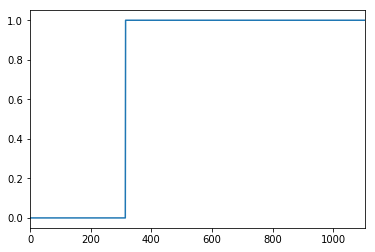

In [5]:
df['y'].plot()

#### The samples are sorted by the target variable, so we need to shuffle the dataframe before creating dataframe (index especially!) for validation puproses

In [6]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,feature-0,feature-1,feature-2,feature-3,feature-4,feature-5,feature-6,feature-7,feature-8,feature-9,...,feature-1515,feature-1516,feature-1517,feature-1518,feature-1519,feature-1520,feature-1521,feature-1522,feature-1523,y
0,18.390244,5.605241,3.000000,4.731707,158.624476,72.159797,1.549658,5.717783,2.198509,7.184370,...,7.163209,3.951244,4.559126,5.140200,5.685703,5.885409,6.272759,6.609097,6.919128,1.0
1,23.456140,5.860679,2.877193,4.764999,163.132413,94.128477,1.458824,5.971772,2.692588,7.484695,...,6.295756,4.043051,4.465908,4.927254,5.412762,5.365099,5.666427,5.940336,6.109942,1.0
2,17.882353,5.711176,3.176471,4.549020,161.005457,69.998673,1.417695,5.798818,3.515523,7.317084,...,6.104793,3.891820,4.382027,4.727388,5.017280,5.236442,5.497168,5.755742,5.971262,1.0
3,43.500000,6.688828,4.043478,10.383790,160.269576,177.542436,1.844864,6.837128,6.922557,8.283126,...,7.052255,4.366278,4.906200,5.470957,5.823600,6.089045,6.313208,6.571977,6.879275,0.0
4,20.560000,6.123796,2.680000,5.920000,165.088853,80.788719,1.335059,6.174052,4.833333,7.684390,...,0.000000,3.238678,3.669951,4.112921,4.525180,4.251170,4.104707,3.446011,3.056357,1.0


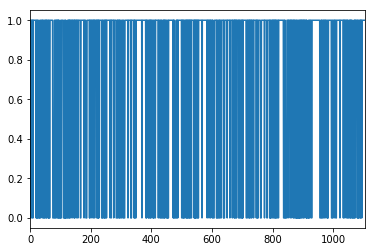

In [7]:
df['y'].plot()

#### Much better!

## 3. Creating X_train, y_train, X_test, y_test

In [8]:
from sklearn.preprocessing import StandardScaler

# as we have a problem with unbalanced classes
# let's keep the ratio between the classes the same
# in train set and test set
X = df.drop(['y'], axis = 1)
y = df['y']
sclaler = StandardScaler()
X = pd.DataFrame(data = sclaler.fit_transform(X))

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.2)
print('Ratio of class 1 in train samples: ',len(y_train[y_train==1])/len(y_train))
print('Ratio of class 1 in test samples: ',len(y_test[y_test==1])/len(y_test))
X_train.head()

Ratio of class 1 in train samples:  0.7149321266968326
Ratio of class 1 in test samples:  0.7149321266968326


,0,1,2,3,4,5,6,7,8,9,...,1514,1515,1516,1517,1518,1519,1520,1521,1522,1523
15,-0.446581,-1.280250,-0.047787,-1.148180,-1.066703,-0.362288,-0.063034,-1.257958,-1.064027,-1.307154,...,-0.176791,0.707848,-0.067841,0.231680,0.414006,0.552347,0.574141,0.655845,0.704732,0.751867
909,-0.214609,0.381016,0.087623,0.164061,0.545991,-0.180655,-0.370567,0.320372,0.188821,0.254596,...,0.326459,-0.080818,0.300611,0.248772,0.192461,0.263459,0.106517,0.015489,0.038831,0.059275
196,-0.305945,-0.183062,-0.690981,-0.089817,-0.030840,-0.254710,-0.421451,-0.223889,0.229607,-0.218590,...,0.574842,0.687458,0.527124,0.524596,0.598367,0.699764,0.759371,0.750214,0.729980,0.721097
60,0.403832,1.058191,1.523844,1.223964,-0.341299,0.261139,0.944862,1.079237,0.383203,0.998301,...,1.200981,0.688107,1.167423,1.092295,0.940524,0.645889,0.629454,0.610215,0.587018,0.641053
177,-0.339610,-0.482758,0.220682,-0.313128,-0.649954,-0.284259,-0.352020,-0.502567,0.045740,-0.461964,...,1.814474,0.677193,1.657381,1.283100,0.913999,0.821969,0.762324,0.681215,0.649971,0.680960


## 4. Feature Selection Methods

#### Here, I will implement 3 feature selection methods: Random Forest, Lasso and Deep Feature Selection form the paper
#### I will train those models separately using 4 fold crossvalidation and Random Search to look for best hyperparameters
#### I will choose models that showed the best ROC AUC

In [9]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,1514,1515,1516,1517,1518,1519,1520,1521,1522,1523
count,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,...,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000,884.000000
mean,0.028799,0.021430,0.041194,0.024951,-0.013051,0.027442,0.028451,0.023035,0.008014,0.020200,...,0.059601,0.046053,0.061106,0.062826,0.060534,0.053988,0.056383,0.051611,0.053582,0.049019
std,1.091466,0.980451,0.981258,0.980285,1.008120,1.100273,1.057127,0.978555,0.976882,0.975172,...,0.977893,0.962690,0.965600,0.932832,0.916286,0.928435,0.916490,0.931374,0.930639,0.949968
min,-0.705372,-1.837649,-3.108360,-2.378447,-3.158620,-0.554419,-1.827492,-1.909228,-1.570259,-1.751417,...,-4.435228,-2.918446,-4.848142,-5.770166,-7.356416,-6.464318,-5.337989,-4.505849,-3.971525,-3.410555
25%,-0.346868,-0.675847,-0.672093,-0.717550,-0.616630,-0.289282,-0.488517,-0.670224,-0.698476,-0.672264,...,-0.516482,-0.320490,-0.435941,-0.418776,-0.421672,-0.410723,-0.419290,-0.367987,-0.386107,-0.366915
50%,-0.173438,-0.162011,0.015279,-0.099027,-0.119469,-0.157279,-0.169071,-0.153178,-0.210559,-0.172394,...,0.051174,0.232949,0.086757,0.143740,0.180669,0.206832,0.204187,0.218844,0.207184,0.203085
75%,0.074154,0.602662,0.776140,0.620805,0.452259,0.023233,0.315091,0.624290,0.538690,0.588600,...,0.690494,0.687072,0.670741,0.680939,0.638001,0.617766,0.629542,0.647286,0.672579,0.677947
max,14.717190,4.874174,3.944963,3.597006,4.780912,15.299418,11.545277,5.382959,6.058919,6.156195,...,2.564417,2.681901,2.640261,2.658611,2.776772,2.811386,2.881865,2.803789,2.813856,2.767153


In [10]:
"""
        CODE BELOW PARTIALY TAKEN FROM 
        http://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html
        
"""
# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print()


### 4.1 DFS

In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884 entries, 15 to 491
Columns: 1524 entries, 0 to 1523
dtypes: float64(1524)
memory usage: 10.3 MB


In [44]:
def elastic_net_loss(weight, alpha):
    l1_loss = tf.reduce_sum(tf.abs(weight))
    l2_loss = tf.nn.l2_loss(weight)
    
    l1_l2_loss = (1-alpha)/2*l2_loss + alpha*l1_loss
    
    return l1_l2_loss

def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]

    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

# Create model
def neural_net(x, Y, layers_num, neurons_num, alpha1=1, alpha2=1, lambda1=0,lambda2=0):
    """
    x: input of the neural network
    layers_num: number of layers for the network
    neurons_num: array of length layers_num where each i'th element determines amount of neurons i'th layer
    
    """
    
    assert layers_num == len(neurons_num)
    n_features = int(x.shape[1])
    weights_array = []
    biases_array = []
    layers_array = []
    
    # First let's add our layer that will select features for us
    weighted_layer = tf.Variable(tf.random_normal(shape=(n_features,), stddev=0.5, dtype='float32'), 
                     dtype='float32', name="W0")
    weights_array.append(weighted_layer)
    biases_array.append(0)
    h0 = tf.multiply(x, weighted_layer)
    layers_array.append(h0)
    
    
    for i in range(layers_num+1):
        if i == 0:
            w_shape = (n_features, neurons_num[0])
            b2 = tf.Variable(np.random.rand(w_shape[1]).astype('float32'), name = 'b'+str(i+1))
            biases_array.append(b2)
        elif i == layers_num:
            w_shape = (neurons_num[-1], 1)
            biases_array.append(0)
        else:
            w_shape = (neurons_num[i-1], neurons_num[i])
            b2 = tf.Variable(np.random.rand(w_shape[1]).astype('float32'), name = 'b'+str(i+1))
            biases_array.append(b2)
        w2 = tf.Variable(tf.truncated_normal(shape= w_shape, stddev=0.001, dtype='float32'), 
                         dtype='float32', name="W"+str(i+1))
        weights_array.append(w2)
        
        if i != layers_num:
            h2 = tf.nn.relu(tf.matmul(layers_array[-1], w2) + b2)
        else:
            # Output layer with a neuron for each class
            h2 = tf.sigmoid(tf.matmul(layers_array[-1], w2))
        layers_array.append(h2)
    

    
    neural_network = tf.reshape(layers_array[-1], shape = [-1])
    
    lr = tf.Variable(learning_rate)
    # Define loss and optimizer

    pure_loss = tf.losses.log_loss(labels=Y,
                              predictions=neural_network)
    
    # Add regularization
    regularizer_weighted_layer = elastic_net_loss(weights_array[0], lambda1)
    regularizer_all_weights = tf.reduce_sum([elastic_net_loss(weight, alpha1) for weight in weights_array[1:]])
    loss = tf.reduce_sum(pure_loss + lambda2*regularizer_weighted_layer + alpha2*regularizer_all_weights)
    
    optimizer = tf.train.AdamOptimizer(learning_rate=lr).minimize(loss)
    #model = tf.argmax(neural_network, 1)

    return (optimizer, neural_network, loss, weighted_layer, pure_loss)

In [113]:
# tf Graph input

def run(X_train, y_train, X_test, y_test, alpha1, alpha2, lambda1, lambda2, layers_num, neurons_num):
    num_input = X_train.shape[1]
    X = tf.placeholder("float", [None, num_input])
    Y = tf.placeholder("float", [None])

    # Construct model
    optimizer, neural_network, loss, weighted_layer, pure_loss = neural_net(X, Y, layers_num = layers_num, 
                                                                            neurons_num = neurons_num,
                                                                            alpha1=alpha1, alpha2=alpha2, 
                                                                            lambda1=lambda1, lambda2=lambda2)

    
    # Evaluate model
    auc_roc = tf.metrics.auc(labels = Y,
                             predictions = neural_network)
    
    history_auc_roc_train= []
    history_auc_roc_test= []
    
    history_loss_train = []
    history_loss_test = []
    
    # Start training
    # Run the initializer
    init = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
    s.run(init)
    
    batch_num = int(X_train.shape[0]/batch_size)
    for epoch in range(epoch_num):
        print('EPOCH ',epoch)
        print('[', end = '')
        X_train, y_train = unison_shuffled_copies(X_train, y_train)

        # Run optimization op (backprop)
        for batch_n in range(batch_num):
            batch_start = batch_n*batch_size

            batch_x = X_train[batch_start:batch_start+batch_size,:]
            batch_y = y_train[batch_start:batch_start+batch_size]


            s.run(optimizer  , feed_dict={X: batch_x, Y: batch_y})
            print('=', end = '')
        print(']')     
        #print(weighted_layer.eval())
        # Calculate batch loss and accuracy
        loss_i, auc_roc_i = s.run([pure_loss, auc_roc], feed_dict={X: X_train,
                                                              Y: y_train})

        val_loss_i, val_auc_roc_i = s.run([pure_loss, auc_roc], feed_dict={X: X_test,
                                                                      Y: y_test})
        history_loss_train.append(loss_i)
        history_loss_test.append(val_loss_i.mean())
        
        history_auc_roc_train.append(sum(auc_roc_i)/len(auc_roc_i))
        history_auc_roc_test.append(sum(val_auc_roc_i)/len(val_auc_roc_i))
   
        print("Minibatch Loss= " + \
              "{:.4f}".format(loss_i) + ", Training ROC AUC= " + \
              "{:.3f}".format(sum(auc_roc_i)/len(auc_roc_i)) + ", Validation ROC AUC= " + \
              "{:.3f}".format(sum(val_auc_roc_i)/len(val_auc_roc_i)) +'\n')


    print("Optimization Finished!")

    # Calculate accuracy for MNIST test images
    print("Final AUC ROC:", s.run(auc_roc, feed_dict={X: X_test,
                                                      Y: y_test}))
    return pd.DataFrame({'Train_loss':history_loss_train, 'Val_loss':history_loss_test,
                         'Train_roc_auc':history_auc_roc_train, 'Val_roc_auc':history_auc_roc_test
                        }), tf.abs(weighted_layer).eval()

In [114]:
learning_rate = 0.0023
epoch_num = 50
batch_size = 50
display_step = 100

alpha1 = 0.8
alpha2 = 2.5e-4
lambda1 = 0.8
lambda2 = 5e-3
layers_num = 2 
neurons_num = [128, 32]
df, dfs_features = run(X_train.values, y_train.values, X_test.values, y_test.values,
                       alpha1, alpha2, lambda1, lambda2, layers_num, neurons_num)




Tensor("Placeholder_61:0", shape=(?,), dtype=float32)
Tensor("Reshape_27:0", shape=(?,), dtype=float32)
EPOCH  0
[=================]
Minibatch Loss= 0.4836, Training ROC AUC= 0.424, Validation ROC AUC= 0.845

EPOCH  1
[=================]
Minibatch Loss= 0.4101, Training ROC AUC= 0.854, Validation ROC AUC= 0.868

EPOCH  2
[=================]
Minibatch Loss= 0.3657, Training ROC AUC= 0.881, Validation ROC AUC= 0.893

EPOCH  3
[=================]
Minibatch Loss= 0.3521, Training ROC AUC= 0.899, Validation ROC AUC= 0.904

EPOCH  4
[=================]
Minibatch Loss= 0.3376, Training ROC AUC= 0.908, Validation ROC AUC= 0.912

EPOCH  5
[=================]
Minibatch Loss= 0.3575, Training ROC AUC= 0.913, Validation ROC AUC= 0.913

EPOCH  6
[=================]
Minibatch Loss= 0.3278, Training ROC AUC= 0.915, Validation ROC AUC= 0.917

EPOCH  7
[=================]
Minibatch Loss= 0.3176, Training ROC AUC= 0.919, Validation ROC AUC= 0.921

EPOCH  8
[=================]
Minibatch Loss= 0.3298, Tra

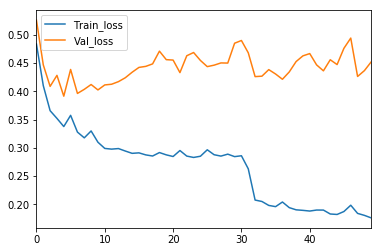

In [116]:
df.loc[:,['Train_loss', 'Val_loss']].plot()

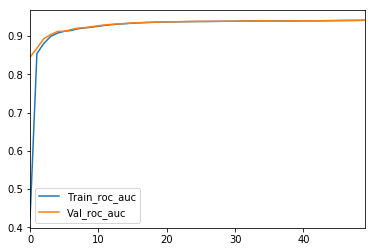

In [117]:
df.loc[:,['Train_roc_auc', 'Val_roc_auc']].plot()

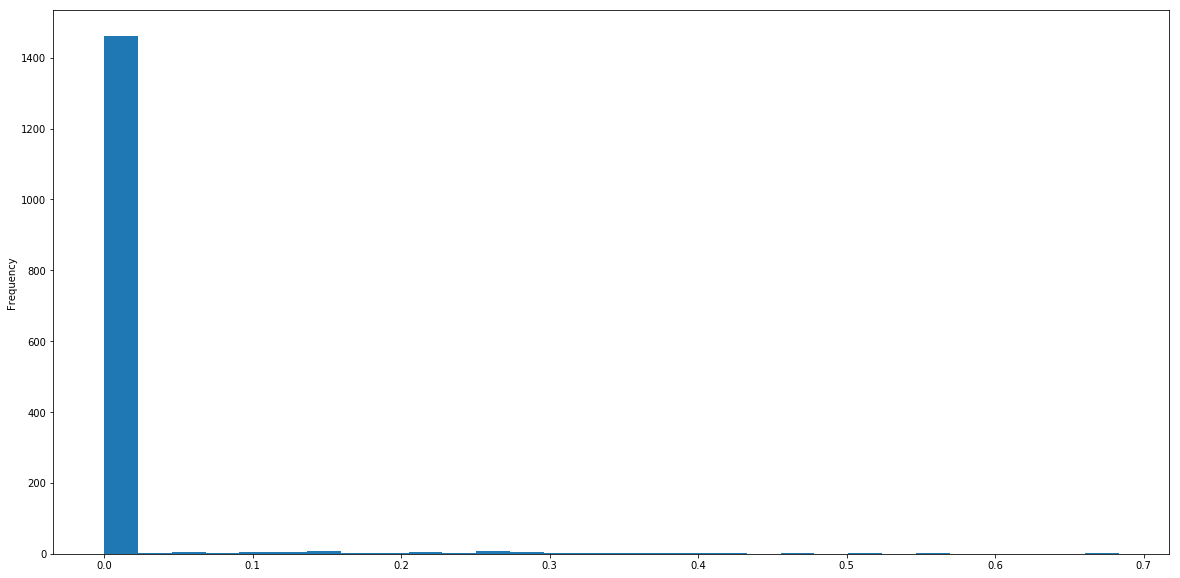

In [118]:
importances = dfs_features
dfs_importances = pd.Series(data = importances, index = X_train.columns)
dfs_importances = dfs_importances.sort_values(ascending = False)
dfs_importances.plot('hist', figsize = (20,10), bins = 30)

### 4.2 Random Forest

In [130]:
from time import time
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# build a classifier

param_dist = {'n_estimators': randint(5, 100),
              "max_depth": randint(1, 10),
              #"max_features": randint(1, 5),
              #"min_samples_split": sp_randint(2, 11),
              #"min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 50
rf = RandomForestClassifier(n_jobs=-1)
random_search = RandomizedSearchCV(rf, param_distributions=param_dist,
                                   cv = 5,
                                   n_iter=n_iter_search,
                                   scoring = 'roc_auc',
                                   verbose = 1)

start = time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  1.7min finished


RandomizedSearchCV took 105.15 seconds for 50 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.929 (std: 0.015)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 98}

Model with rank: 2
Mean validation score: 0.925 (std: 0.013)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 70}

Model with rank: 3
Mean validation score: 0.924 (std: 0.016)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 6, 'n_estimators': 61}

Model with rank: 4
Mean validation score: 0.924 (std: 0.016)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 97}

Model with rank: 5
Mean validation score: 0.924 (std: 0.020)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 6, 'n_estimators': 79}



In [131]:
y_pred_train = random_search.best_estimator_.predict_proba(X_train)
print('train_score :',
      roc_auc_score(y_train, np.argmax(y_pred_train, axis = 1)))
y_pred = random_search.best_estimator_.predict_proba(X_test)
print('test_score :',
      roc_auc_score(y_test, np.argmax(y_pred, axis = 1)))

train_score : 1.0
test_score : 0.7603475989551939


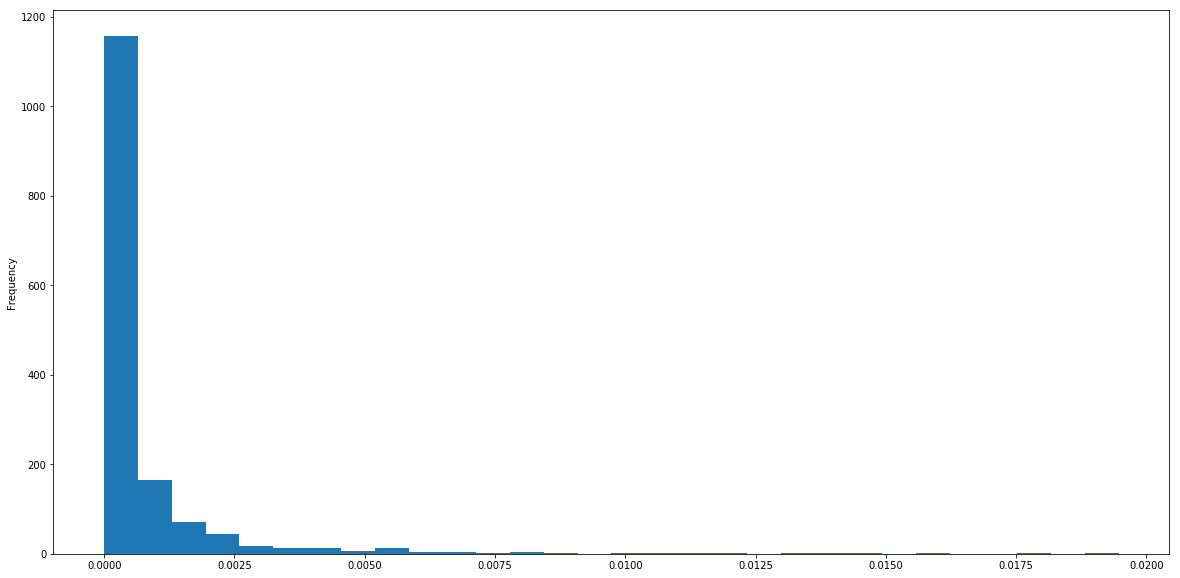

In [143]:
rf_importances = random_search.best_estimator_.feature_importances_
rf_importances = pd.Series(data = importances, index = X_train.columns)
rf_importances = rf_importances.sort_values(ascending = False)
rf_importances.plot('hist', figsize = (20,10), bins = 30)
# rf_coeffs = rf_importances[rf_importances > 0.002].index
# rf_coeffs

### 4.3 LASSO

In [198]:
from time import time
from sklearn.linear_model import LogisticRegression


param_dist = {"C": uniform(1e-8, 0.2),
              "tol": uniform(1e-8, 1e-1),
              "penalty": ['l1'],
              "solver": ['liblinear', 'saga'],
              #"dual": [True, False],
              'class_weight': ['balanced', None]}

# build a classifier
logreg = LogisticRegression(n_jobs=-1)

# run randomized search
n_iter_search = 100
random_search = RandomizedSearchCV(logreg, param_distributions=param_dist,
                                   cv = 4,
                                   n_iter=n_iter_search,
                                   verbose = 1)

start = time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

Fitting 4 folds for each of 100 candidates, totalling 400 fits
RandomizedSearchCV took 101.69 seconds for 100 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.873 (std: 0.022)
Parameters: {'C': 0.04839117520342055, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.01419163963813121}

Model with rank: 1
Mean validation score: 0.873 (std: 0.027)
Parameters: {'C': 0.05796254736812181, 'class_weight': None, 'penalty': 'l1', 'solver': 'saga', 'tol': 0.015112168695327794}

Model with rank: 3
Mean validation score: 0.872 (std: 0.021)
Parameters: {'C': 0.08209012315999376, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.03190261348499703}

Model with rank: 3
Mean validation score: 0.872 (std: 0.028)
Parameters: {'C': 0.03960898020538497, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.09654868596885065}

Model with rank: 3
Mean validation score: 0.872 (std: 0.021)
Parameters: {'C': 0.0710520974634188, 

[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  1.7min finished


In [199]:
y_pred_train = random_search.best_estimator_.predict_proba(X_train)
print('train_score :',
      roc_auc_score(y_train, np.argmax(y_pred_train, axis = 1)))
y_pred = random_search.best_estimator_.predict_proba(X_test)
print('test_score :',
      roc_auc_score(y_test, np.argmax(y_pred, axis = 1)))

train_score : 0.8401522001205545
test_score : 0.8000803697006228


In [158]:
lasso_importances = pd.Series(data = random_search.best_estimator_.coef_[0], index = X_train.columns)
lasso_importances = abs(lasso_importances).sort_values(ascending = False)
lasso_importances

806     1.191595
660     0.418731
1460    0.387793
458     0.317734
134     0.286921
982     0.266447
1191    0.242591
862     0.241624
1019    0.241099
1174    0.239112
685     0.236204
834     0.230804
1386    0.200180
1199    0.196659
463     0.193905
879     0.188873
1193    0.184849
672     0.175630
1072    0.156427
37      0.153968
1014    0.150189
1415    0.146720
560     0.141302
1004    0.140210
831     0.136572
1476    0.135816
1031    0.135274
1007    0.134545
1049    0.127973
876     0.123997
          ...   
1021    0.000000
1022    0.000000
1023    0.000000
1024    0.000000
1026    0.000000
1027    0.000000
1028    0.000000
1030    0.000000
1003    0.000000
1000    0.000000
975     0.000000
997     0.000000
976     0.000000
977     0.000000
979     0.000000
980     0.000000
981     0.000000
983     0.000000
984     0.000000
985     0.000000
986     0.000000
987     0.000000
988     0.000000
989     0.000000
991     0.000000
993     0.000000
994     0.000000
995     0.0000

## 5. Final Models

#### For the purpose of comparing different methods for feature selection, I will use three final models: Random Forest, MLP and XGBoost

#### I will use different number of features from array top_k_features and sample it from feature selection methods listed above

In [162]:
top_k_features = [2**i for i in range(1,11)]
top_k_features.append(X_train.shape[1])
top_k_features

[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 1524]

### 5.1 MLP Classifier

In [174]:
#from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

param_dist = {'hidden_layer_sizes': [(128,), (128,32), (64,), (32,)],
              'activation': ['logistic', 'relu'],
              'solver' : ['sgd', 'adam'],
              'alpha': [10**(-i) for i in range(2,5)],#sp_randint(3, 5),
              'learning_rate_init': [10**(-i) for i in range(2,5)],
              'max_iter': [50]
              }

mlp_history = {'RF':[], 
               'LASSO':[], 
               'DFS':[]}



for method in feature_selection_methods:
    print('USING FEATURES FROM ' + method)
    feature_weights = feature_selection_importances[method]
    for k in top_k_features:
        print('Using =', k, 'features')
        ind = feature_weights.iloc[:k].index
        X_train_i = X_train.loc[:,ind]
        X_test_i = X_test.loc[:,ind]

        # run randomized search
        n_iter_search = 10
        mlp = MLPClassifier()
        random_search = RandomizedSearchCV(mlp, param_distributions=param_dist,
                                           cv = 4,
                                           n_iter=n_iter_search,
                                           scoring = 'roc_auc',
                                           verbose = 0)

        start = time()
        random_search.fit(X_train_i, y_train)

        y_pred_train = random_search.best_estimator_.predict_proba(X_train_i)
        train_score_i = roc_auc_score(y_train, np.argmax(y_pred_train, axis = 1))
        
        y_pred = random_search.best_estimator_.predict_proba(X_test_i)
        val_score_i = roc_auc_score(y_test, np.argmax(y_pred, axis = 1))
        
        print('Train_score =', train_score_i, ', Val_score =', val_score_i)
        mlp_history[method].append(val_score_i)

USING FEATURES FROM RF
Using = 2 features
Train_score = 0.6707102672292545 , Val_score = 0.6476793248945147
Using = 4 features
Train_score = 0.7905741410488245 , Val_score = 0.730309423347398
Using = 8 features
Train_score = 0.8556359252561784 , Val_score = 0.798523206751055
Using = 16 features
Train_score = 0.8968630701225638 , Val_score = 0.782650190878039
Using = 32 features
Train_score = 0.921853023909986 , Val_score = 0.7731062889290738
Using = 64 features
Train_score = 0.965478702029335 , Val_score = 0.7540184850311433
Using = 128 features
Train_score = 0.8929073739200322 , Val_score = 0.8032449266626481
Using = 256 features
Train_score = 0.9285839863371509 , Val_score = 0.7762708458910992
Using = 512 features
Train_score = 0.9072106690777577 , Val_score = 0.7842073538276069
Using = 1024 features
Train_score = 0.8683192686357243 , Val_score = 0.7810427968655818
Using = 1524 features
Train_score = 0.9992088607594937 , Val_score = 0.8318264014466547
USING FEATURES FROM LASSO
Using 

### 5.2 Random Forest

In [169]:
from time import time
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# build a classifier

param_dist = {'n_estimators': randint(5, 100),
              "max_depth": randint(1, 10),
              #"max_features": randint(1, 5),
              #"min_samples_split": sp_randint(2, 11),
              #"min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

feature_selection_methods = ['RF', 'LASSO', 'DFS']

feature_selection_importances = {'RF':rf_importances, 
                                 'LASSO':lasso_importances, 
                                 'DFS':dfs_importances}

rf_history = {'RF':[], 
              'LASSO':[], 
              'DFS':[]}



for method in feature_selection_methods:
    print('USING FEATURES FROM ' + method)
    feature_weights = feature_selection_importances[method]
    for k in top_k_features:
        print('Using =', k, 'features')
        ind = feature_weights.iloc[:k].index
        X_train_i = X_train.loc[:,ind]
        X_test_i = X_test.loc[:,ind]

        # run randomized search
        n_iter_search = 10
        rf = RandomForestClassifier(n_jobs=-1)
        random_search = RandomizedSearchCV(rf, param_distributions=param_dist,
                                           cv = 4,
                                           n_iter=n_iter_search,
                                           scoring = 'roc_auc',
                                           verbose = 0)

        start = time()
        random_search.fit(X_train_i, y_train)

        y_pred_train = random_search.best_estimator_.predict_proba(X_train_i)
        train_score_i = roc_auc_score(y_train, np.argmax(y_pred_train, axis = 1))
        
        y_pred = random_search.best_estimator_.predict_proba(X_test_i)
        val_score_i = roc_auc_score(y_test, np.argmax(y_pred, axis = 1))
        
        print('Train_score =', train_score_i, ', Val_score =', val_score_i)
        rf_history[method].append(val_score_i)

USING FEATURES FROM RF
Using = 2 features
Train_score = 0.8009468555354631 , Val_score = 0.811332127787824
Using = 4 features
Train_score = 0.8976290938316255 , Val_score = 0.7509543901948965
Using = 8 features
Train_score = 0.9198437813944143 , Val_score = 0.782650190878039
Using = 16 features
Train_score = 0.9821428571428572 , Val_score = 0.7969158127385976
Using = 32 features
Train_score = 0.9563492063492063 , Val_score = 0.8286618444846293
Using = 64 features
Train_score = 0.9781746031746033 , Val_score = 0.7889793048020897
Using = 128 features
Train_score = 0.9503968253968255 , Val_score = 0.8222824994976894
Using = 256 features
Train_score = 0.9563492063492063 , Val_score = 0.8016375326501909
Using = 512 features
Train_score = 0.996031746031746 , Val_score = 0.7984729756881656
Using = 1024 features
Train_score = 1.0 , Val_score = 0.7857645167771751
Using = 1524 features
Train_score = 0.998015873015873 , Val_score = 0.7492465340566605
USING FEATURES FROM LASSO
Using = 2 features
T

In [172]:
8+3

11

### 5.3 XGBoost

In [170]:
from xgboost import XGBClassifier
# build a classifier

param_dist = {'learning_rate': uniform(0.001, 1.5),
              'n_estimators': randint(30, 200),
              'gamma': randint(3, 6),
              'max_depth' : randint(1,15)
              }

xgb_history = {'RF':[], 
               'LASSO':[], 
               'DFS':[]}



for method in feature_selection_methods:
    print('USING FEATURES FROM ' + method)
    feature_weights = feature_selection_importances[method]
    for k in top_k_features:
        print('Using =', k, 'features')
        ind = feature_weights.iloc[:k].index
        X_train_i = X_train.loc[:,ind]
        X_test_i = X_test.loc[:,ind]

        # run randomized search
        n_iter_search = 10
        xgb = XGBClassifier(n_jobs = 8)
        
        random_search = RandomizedSearchCV(xgb, param_distributions=param_dist,
                                           cv = 4,
                                           n_iter=n_iter_search,
                                           scoring = 'roc_auc',
                                           verbose = 0)

        start = time()
        random_search.fit(X_train_i, y_train)

        y_pred_train = random_search.best_estimator_.predict_proba(X_train_i)
        train_score_i = roc_auc_score(y_train, np.argmax(y_pred_train, axis = 1))
        
        y_pred = random_search.best_estimator_.predict_proba(X_test_i)
        val_score_i = roc_auc_score(y_test, np.argmax(y_pred, axis = 1))
        
        print('Train_score =', train_score_i, ', Val_score =', val_score_i)
        xgb_history[method].append(val_score_i)

USING FEATURES FROM RF
Using = 2 features
Train_score = 0.8009468555354631 , Val_score = 0.811332127787824
Using = 4 features
Train_score = 0.8012733574442436 , Val_score = 0.7557263411693791
Using = 8 features
Train_score = 0.8798096242716495 , Val_score = 0.7699919630299377
Using = 16 features
Train_score = 0.8972523608599557 , Val_score = 0.8175607795860961
Using = 32 features
Train_score = 0.9412798874824191 , Val_score = 0.8286618444846293
Using = 64 features
Train_score = 0.9496182439220413 , Val_score = 0.825497287522604
Using = 128 features
Train_score = 0.9682665260196905 , Val_score = 0.8095740405866988
Using = 256 features
Train_score = 0.9833358448864779 , Val_score = 0.7683343379545912
Using = 512 features
Train_score = 0.9587351818364477 , Val_score = 0.8397629093831626
Using = 1024 features
Train_score = 0.9742063492063492 , Val_score = 0.8080168776371308
Using = 1524 features
Train_score = 0.996031746031746 , Val_score = 0.790586698814547
USING FEATURES FROM LASSO
Using

## 6. Conclusions

      MLP_final  RF_final  XGB_final
2      0.647679  0.811332   0.811332
4      0.730309  0.750954   0.755726
8      0.798523  0.782650   0.769992
16     0.782650  0.796916   0.817561
32     0.773106  0.828662   0.828662
64     0.754018  0.788979   0.825497
128    0.803245  0.822282   0.809574
256    0.776271  0.801638   0.768334
512    0.784207  0.798473   0.839763
1024   0.781043  0.785765   0.808017
1524   0.831826  0.749247   0.790587
MLP_final best result = 0.8318 with 1524 elements
RF_final best result = 0.8287 with 32 elements
XGB_final best result = 0.8398 with 512 elements


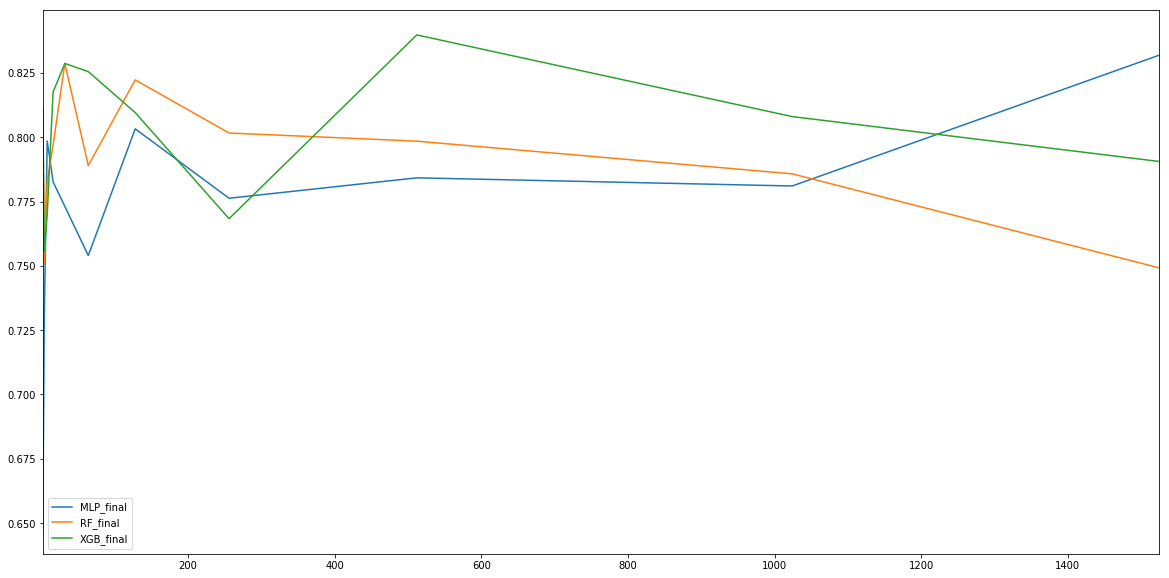

In [185]:
feature_selection_methods = ['RF', 'LASSO', 'DFS']

RF_extraction = pd.DataFrame({'RF_final':rf_history['RF'], 
                              'XGB_final':xgb_history['RF'], 
                              'MLP_final': mlp_history['RF']}, 
                             index = top_k_features)

print(RF_extraction)

bests_results = {'RF':[],
                 'LASSO':[],
                 'DFS':[]}
best_element_num = {'RF':[],
                    'LASSO':[],
                    'DFS':[]}


for col in RF_extraction.columns:
    best_res = round(RF_extraction[col].max(),4)
    best_num = RF_extraction[col].idxmax()
    bests_results['RF'].append(best_res)
    best_element_num['RF'].append(best_num)
    print(col + ' best result =', best_res, 'with', RF_extraction[col].idxmax(),'elements')
    
RF_extraction.plot(figsize =(20,10))

      MLP_final  RF_final  XGB_final
2      0.562035  0.539833   0.562035
4      0.750954  0.792194   0.795359
8      0.803295  0.787422   0.782650
16     0.782650  0.800131   0.811232
32     0.806460  0.808017   0.804852
64     0.815953  0.814346   0.812789
128    0.815953  0.793701   0.795308
256    0.788979  0.766727   0.800080
512    0.793751  0.761955   0.822282
1024   0.850864  0.746082   0.800080
1524   0.777878  0.741310   0.831826
MLP_final best result = 0.8509 with 1024 elements
RF_final best result = 0.8143 with 64 elements
XGB_final best result = 0.8318 with 1524 elements


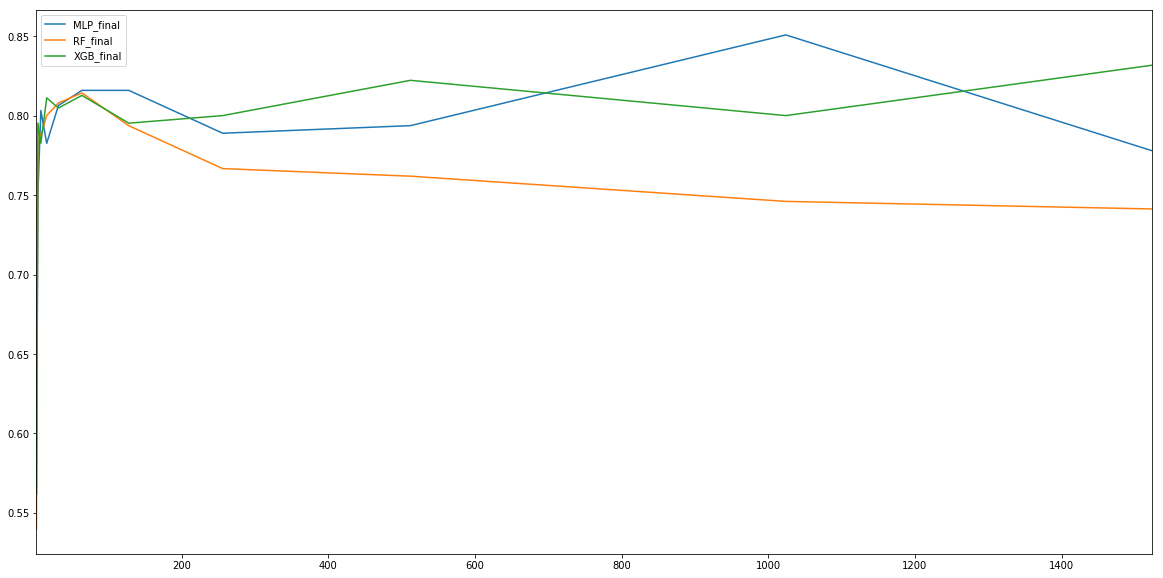

In [187]:
LASSO_extraction = pd.DataFrame({'RF_final':rf_history['LASSO'], 
                                 'XGB_final':xgb_history['LASSO'], 
                                 'MLP_final': mlp_history['LASSO']}, 
                                index = top_k_features)
print(LASSO_extraction)
for col in LASSO_extraction.columns:
    best_res = round(LASSO_extraction[col].max(),4)
    best_num = LASSO_extraction[col].idxmax()
    bests_results['LASSO'].append(best_res)
    best_element_num['LASSO'].append(best_num)
    print(col + ' best result =', best_res, 'with', best_num,'elements')
LASSO_extraction.plot(figsize =(20,10))

      MLP_final  RF_final  XGB_final
2      0.577808  0.811332   0.811332
4      0.819218  0.804903   0.796966
8      0.828712  0.839863   0.827155
16     0.781043  0.823940   0.781093
32     0.771549  0.808017   0.815953
64     0.800080  0.796916   0.785815
128    0.769942  0.779435   0.814396
256    0.754069  0.758790   0.814396
512    0.846092  0.725437   0.779435
1024   0.784207  0.768284   0.827054
1524   0.849307  0.714336   0.828662
MLP_final best result = 0.8493 with 1524 elements
RF_final best result = 0.8399 with 8 elements
XGB_final best result = 0.8287 with 1524 elements


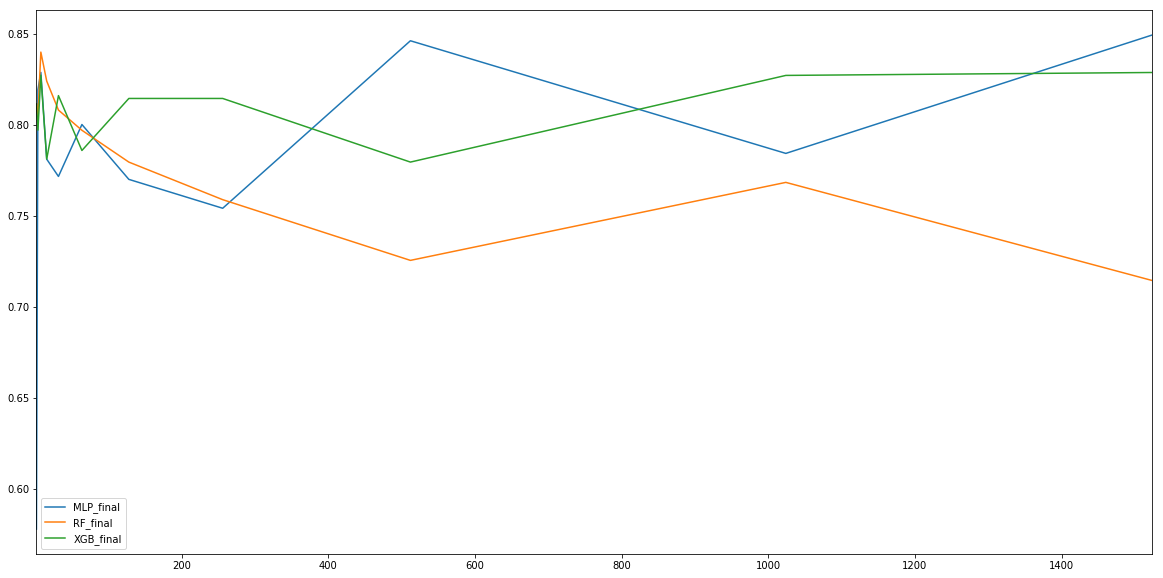

In [186]:
DFS_extraction = pd.DataFrame({'RF_final':rf_history['DFS'], 
                               'XGB_final':xgb_history['DFS'], 
                               'MLP_final': mlp_history['DFS']}, 
                              index = top_k_features)
print(DFS_extraction)

for col in DFS_extraction.columns:
    best_res = round(DFS_extraction[col].max(),4)
    best_num = DFS_extraction[col].idxmax()
    bests_results['DFS'].append(best_res)
    best_element_num['DFS'].append(best_num)
    print(col + ' best result =', best_res, 'with', best_num,'elements')
    
DFS_extraction.plot(figsize =(20,10))

In [194]:
bests_results_fin = pd.DataFrame(bests_results, index = RF_extraction.columns)
bests_results_fin

,DFS,LASSO,RF
MLP_final,0.8493,0.8509,0.8318
RF_final,0.8399,0.8143,0.8287
XGB_final,0.8287,0.8318,0.8398


In [195]:
best_element_num_fin = pd.DataFrame(best_element_num, index = RF_extraction.columns)
best_element_num_fin

,DFS,LASSO,RF
MLP_final,1524,1024,1524
RF_final,8,64,32
XGB_final,1524,1524,512


As we can see, the best results achieved MLP model with features from LASSO Feature Selection method with ROC AUC at 0.8509.
Worth noting that DFS selection method with combination with MLP also got good results: ROC AUC 0.8493.

To determine which method is the best it is worth considering further testing with more sophisticated fine-tuning of hyperparameters.